In [1]:
# 🔧 Install YOLOv8
!pip install -q ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 110.0 MB/s eta 0:00:00


In [2]:
# 📦 Import required libraries
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# 🧠 Load pre-trained YOLOv8 model (Nano is light & fast)
model = YOLO("yolov8n.pt")  # or "yolov8s.pt" for better accuracy

# ✅ Confirm it's working
print("YOLOv8 model loaded successfully.")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv8 model loaded successfully.


In [9]:
from google.colab import files
files.upload()


Saving kaggle (4).json to kaggle (4).json


{'kaggle (4).json': b'{"username":"dilpreetkaurr11","key":"0e510a4b254522f455d1d19ce6b7c809"}'}

In [10]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [12]:
!kaggle datasets list -s "coco"


ref                                                                 title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  ------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
awsaf49/coco-2017-dataset                                           COCO 2017 Dataset                                 26884362165  2020-09-04 05:05:02.617000          56522        446  0.6875           
valentynsichkar/yolo-coco-data                                      yolo-coco-data                                      230548020  2019-07-20 21:41:38.363000          14243        101  1.0              
ultralytics/coco128                                                 coco128                                               6982104  2022-10-19 10:31:47.777000          30820        136  0.8

In [15]:
!kaggle datasets download -d iqmansingh/guns-knives-object-detection
!unzip -q guns-knives-object-detection.zip -d weapons_dataset


Dataset URL: https://www.kaggle.com/datasets/iqmansingh/guns-knives-object-detection
License(s): CC0-1.0
 91% 124M/136M [00:00<00:00, 1.30GB/s]
100% 136M/136M [00:00<00:00, 1.25GB/s]


In [16]:
import glob
images = glob.glob("weapons_dataset/images/*.jpg")
print("Total images:", len(images))
print("Sample paths:", images[:3])


Total images: 0
Sample paths: []


In [17]:
import os

for root, dirs, files in os.walk("weapons_dataset"):
    print(f"\n📂 Directory: {root}")
    for file in files[:5]:  # print first 5 files only
        print("   📄", file)



📂 Directory: weapons_dataset

📂 Directory: weapons_dataset/guns-knives-yolo

📂 Directory: weapons_dataset/guns-knives-yolo/guns-knives-yolo
   📄 data.yaml

📂 Directory: weapons_dataset/guns-knives-yolo/guns-knives-yolo/test

📂 Directory: weapons_dataset/guns-knives-yolo/guns-knives-yolo/test/images
   📄 MBbframe00265_jpg.rf.7a002faa199cf5c899728e46bd47ce64.jpg
   📄 ABsframe00214_jpg.rf.ae6c1e7d4c8e474123569e8bfa08f701.jpg
   📄 KravMagaTraining743_jpg.rf.eddc26482f407fd39097a8ee2a934d9a.jpg
   📄 LBbframe00361_jpg.rf.bb9d83e2a1216f7fd792eb6b9933d927.jpg
   📄 k1024_jpg.rf.eb7b098a03930a696473779794937fea.jpg

📂 Directory: weapons_dataset/guns-knives-yolo/guns-knives-yolo/test/labels
   📄 kp1372_jpg.rf.2eb5494e652ad17841d5c23d18149fd1.txt
   📄 KravMagaKnifeDefenseTechniques072_jpg.rf.7762fbcd86c9574669d3c8ee26386fa8.txt
   📄 knife_1079_jpg.rf.efdb2f0e8ca7f44e1731ec66894929d4.txt
   📄 armas--1467-_jpg.rf.94b6864c051032cd3ef239368b15ef91.txt
   📄 armas--2475-_jpg.rf.cc1c5d1ac7fb772c6675e9b3

Found 1043 images
Example paths: ['weapons_dataset/guns-knives-yolo/guns-knives-yolo/valid/images/armas--1983-_jpg.rf.f174f4029503e90f4708bc0d6ab18915.jpg', 'weapons_dataset/guns-knives-yolo/guns-knives-yolo/valid/images/knifeDefenseTechnique111_jpg.rf.404d79ae061f8309224d000446b1194d.jpg', 'weapons_dataset/guns-knives-yolo/guns-knives-yolo/valid/images/armas--2826-_jpg.rf.08af786f8e994c77e41b2f07e053a112.jpg']

image 1/1 /content/weapons_dataset/guns-knives-yolo/guns-knives-yolo/valid/images/armas--2291-_jpg.rf.f431150e28a7e3ac0d22a1125bdbfa41.jpg: 640x640 (no detections), 7.9ms
Speed: 14.8ms preprocess, 7.9ms inference, 94.9ms postprocess per image at shape (1, 3, 640, 640)


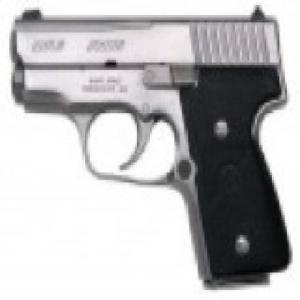


image 1/1 /content/weapons_dataset/guns-knives-yolo/guns-knives-yolo/valid/images/KravMagaKnifeDefenseTechniques713_jpg.rf.70d47b90fe7bcc3bb22adee23d54b048.jpg: 640x640 2 persons, 1 remote, 10.1ms
Speed: 3.5ms preprocess, 10.1ms inference, 240.4ms postprocess per image at shape (1, 3, 640, 640)


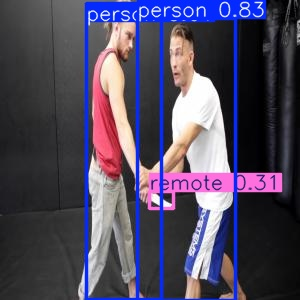


image 1/1 /content/weapons_dataset/guns-knives-yolo/guns-knives-yolo/valid/images/MBsframe00457_jpg.rf.d2964c49aa758d2351857c3fa9545f54.jpg: 640x640 1 person, 1 potted plant, 9.7ms
Speed: 4.9ms preprocess, 9.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


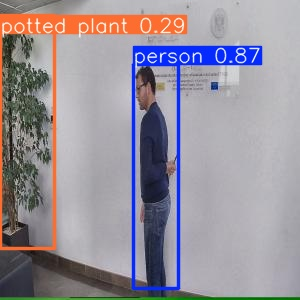

In [18]:
from ultralytics import YOLO
import glob
import random
from IPython.display import Image, display

# Load pretrained YOLOv8 model (COCO classes)
model = YOLO("yolov8n.pt")  # or yolov8s.pt for slightly better accuracy

# Get image paths from the valid folder
image_paths = glob.glob("weapons_dataset/guns-knives-yolo/guns-knives-yolo/valid/images/*.jpg")

# Show sample image paths
print(f"Found {len(image_paths)} images")
print("Example paths:", image_paths[:3])

# Run inference on 3 random images
sample_imgs = random.sample(image_paths, 3)

for img_path in sample_imgs:
    results = model(img_path, conf=0.25)
    results[0].save(filename="result.jpg")  # Save image with bounding boxes
    display(Image("result.jpg"))


In [19]:
!pip install ultralytics --upgrade -q
from ultralytics import YOLO


In [20]:
%%writefile weapons.yaml
path: /content/weapons_dataset/guns-knives-yolo/guns-knives-yolo
train: train/images
val: valid/images

names:
  0: gun
  1: knife


Writing weapons.yaml


In [21]:
model = YOLO("yolov8n.pt")  # You can also use yolov8s.pt, yolov8m.pt, etc.

model.train(
    data="weapons.yaml",
    epochs=20,
    imgsz=640,
    batch=8,
    project="weapons_detection",
    name="yolov8n_custom",
    pretrained=True  # Start from COCO weights
)


Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=weapons.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_custom, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, p

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1     37248  ultralytics.nn.modules.block.C2f             [192, 64, 1]                  
 16                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  1    123648  ultralytics.nn.modules.block.C2f             [192, 128, 1]                 
 19                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 469.2±123.7 MB/s, size: 11.5 KB)


train: Scanning /content/weapons_dataset/guns-knives-yolo/guns-knives-yolo/train/labels... 4409 images, 20 backgrounds, 0 corrupt: 100%|██████████| 4409/4409 [00:01<00:00, 2506.23it/s]

train: New cache created: /content/weapons_dataset/guns-knives-yolo/guns-knives-yolo/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3, len(boxes) = 5110. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 201.8±118.4 MB/s, size: 9.1 KB)


val: Scanning /content/weapons_dataset/guns-knives-yolo/guns-knives-yolo/valid/labels... 1043 images, 7 backgrounds, 0 corrupt: 100%|██████████| 1043/1043 [00:00<00:00, 1174.57it/s]

val: New cache created: /content/weapons_dataset/guns-knives-yolo/guns-knives-yolo/valid/labels.cache


Plotting labels to weapons_detection/yolov8n_custom/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to weapons_detection/yolov8n_custom
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      1.11G      1.361      2.513      1.598          1        640: 100%|██████████| 552/552 [01:32<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:09<00:00,  6.76it/s]


                   all       1043       1203      0.412      0.366      0.324       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      1.36G      1.477      2.214      1.724          1        640: 100%|██████████| 552/552 [01:24<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:08<00:00,  7.92it/s]


                   all       1043       1203      0.382      0.429      0.346      0.175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      1.37G      1.452      2.079       1.71          1        640: 100%|██████████| 552/552 [01:24<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:07<00:00,  8.85it/s]


                   all       1043       1203      0.496      0.337      0.356      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      1.39G      1.401      1.977       1.67          2        640: 100%|██████████| 552/552 [01:29<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:08<00:00,  7.99it/s]


                   all       1043       1203      0.599      0.498      0.547      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       1.4G      1.345       1.86      1.623          2        640: 100%|██████████| 552/552 [01:25<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:08<00:00,  8.13it/s]


                   all       1043       1203      0.637      0.524      0.579      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      1.42G      1.299      1.709      1.575          2        640: 100%|██████████| 552/552 [01:23<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:07<00:00,  8.97it/s]


                   all       1043       1203      0.694      0.554      0.628      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      1.44G      1.269      1.681      1.557          2        640: 100%|██████████| 552/552 [01:24<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:07<00:00,  8.95it/s]


                   all       1043       1203      0.703      0.557       0.63      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      1.46G      1.224      1.606      1.529          1        640: 100%|██████████| 552/552 [01:23<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:07<00:00,  8.83it/s]


                   all       1043       1203      0.734      0.599      0.682      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      1.47G      1.213      1.553      1.503          2        640: 100%|██████████| 552/552 [01:23<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:07<00:00,  8.68it/s]


                   all       1043       1203      0.698      0.629      0.708      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      1.49G      1.186      1.487      1.483          0        640: 100%|██████████| 552/552 [01:23<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:08<00:00,  8.21it/s]


                   all       1043       1203       0.77      0.644      0.744      0.497
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      1.51G      1.164      1.379      1.545          1        640: 100%|██████████| 552/552 [01:20<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:07<00:00,  8.54it/s]


                   all       1043       1203      0.831      0.646      0.773      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      1.52G      1.102      1.224      1.474          1        640: 100%|██████████| 552/552 [01:18<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:07<00:00,  9.13it/s]


                   all       1043       1203      0.834      0.667       0.79      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      1.54G      1.077      1.159      1.456          1        640: 100%|██████████| 552/552 [01:18<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:08<00:00,  8.04it/s]


                   all       1043       1203      0.848      0.678      0.806      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      1.56G      1.047      1.103      1.424          4        640: 100%|██████████| 552/552 [01:19<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:08<00:00,  7.94it/s]


                   all       1043       1203      0.842      0.714      0.822      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      1.57G      1.024      1.047      1.399          1        640: 100%|██████████| 552/552 [01:19<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:08<00:00,  7.91it/s]

                   all       1043       1203      0.845       0.74      0.836      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      1.59G     0.9917     0.9957      1.376          1        640: 100%|██████████| 552/552 [01:19<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:07<00:00,  8.76it/s]

                   all       1043       1203      0.849      0.739      0.846        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      1.61G     0.9643     0.9598      1.353          1        640: 100%|██████████| 552/552 [01:22<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:07<00:00,  8.52it/s]

                   all       1043       1203      0.872      0.767      0.864      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      1.63G     0.9302     0.8889      1.332          1        640: 100%|██████████| 552/552 [01:20<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:07<00:00,  9.09it/s]

                   all       1043       1203      0.862      0.772      0.865       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      1.64G     0.9016     0.8538      1.299          1        640: 100%|██████████| 552/552 [01:19<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:07<00:00,  8.39it/s]

                   all       1043       1203      0.861      0.788      0.875      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      1.66G     0.8862     0.8281      1.285          1        640: 100%|██████████| 552/552 [01:19<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:08<00:00,  7.84it/s]

                   all       1043       1203      0.863      0.798      0.885      0.644



20 epochs completed in 0.506 hours.
Optimizer stripped from weapons_detection/yolov8n_custom/weights/last.pt, 6.2MB
Optimizer stripped from weapons_detection/yolov8n_custom/weights/best.pt, 6.2MB

Validating weapons_detection/yolov8n_custom/weights/best.pt...
Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:09<00:00,  6.99it/s]


                   all       1043       1203      0.862        0.8      0.885      0.643
                   gun        542        601      0.873      0.815      0.895       0.59
                 knife        494        602       0.85      0.784      0.876      0.697
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to weapons_detection/yolov8n_custom


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x792cb5fe5890>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [22]:
metrics = model.val()


Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 293.5±131.9 MB/s, size: 8.1 KB)


val: Scanning /content/weapons_dataset/guns-knives-yolo/guns-knives-yolo/valid/labels.cache... 1043 images, 7 backgrounds, 0 corrupt: 100%|██████████| 1043/1043 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 131/131 [00:09<00:00, 13.48it/s]


                   all       1043       1203      0.862      0.799      0.885      0.643
                   gun        542        601      0.873      0.815      0.895      0.589
                 knife        494        602      0.851      0.782      0.876      0.697
Speed: 0.5ms preprocess, 4.0ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to weapons_detection/yolov8n_custom2


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/weapons_dataset/guns-knives-yolo/guns-knives-yolo/valid/images/knifeDefenseTechnique111_jpg.rf.404d79ae061f8309224d000446b1194d.jpg: 640x640 1 gun, 7.2ms
Speed: 2.7ms preprocess, 7.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


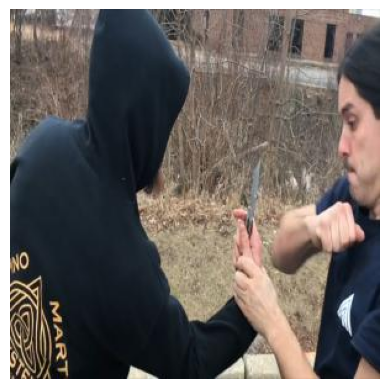

In [23]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
model = YOLO('weapons_detection/yolov8n_custom/weights/best.pt')

# Run detection on a test image
results = model('/content/weapons_dataset/guns-knives-yolo/guns-knives-yolo/valid/images/knifeDefenseTechnique111_jpg.rf.404d79ae061f8309224d000446b1194d.jpg', show=True, conf=0.4)

# Display image
img = Image.open('/content/weapons_dataset/guns-knives-yolo/guns-knives-yolo/valid/images/knifeDefenseTechnique111_jpg.rf.404d79ae061f8309224d000446b1194d.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()


In [26]:
import shutil

# Path to your best model file
model_path = '/content/weapons_detection/yolov8n_custom/weights/best.pt'

# Define zip file name
zip_file_name = '/content/yolov8n_custom_model.zip'

# Zip the folder containing the model (just the .pt file in this case)
shutil.make_archive(base_name=zip_file_name.replace(".zip", ""), format='zip', root_dir='/content/weapons_detection/yolov8n_custom/weights', base_dir='.')

# Download it to your local machine
from google.colab import files
files.download(zip_file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>